<a href="https://colab.research.google.com/github/gorzanskik-ai/statistics/blob/main/02_probits/05_boxplot_quantiles_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/statistics/data/yellow_tripdata_2021-05.parquet"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
taxi = pd.read_parquet(path, engine='auto',
        columns=['trip_distance', 'tpep_pickup_datetime', "tip_amount", "fare_amount","RatecodeID"],
        storage_options=None, use_nullable_dtypes=False)

taxi.query("tpep_pickup_datetime>='2021-05-09' and tpep_pickup_datetime<'2021-05-10'",
    inplace=True)

taxi.query("tip_amount<=100 and fare_amount>0 and RatecodeID==4 and tip_amount>0", inplace=True)

In [28]:
taxi.head()

,trip_distance,tpep_pickup_datetime,tip_amount,fare_amount,RatecodeID
611116,6.07,2021-05-09 00:08:11,4.41,19.5,4.0
613423,20.66,2021-05-09 01:37:59,12.86,57.5,4.0
613738,44.00,2021-05-09 01:24:40,15.00,98.0,4.0
614041,37.70,2021-05-09 01:05:09,1.50,169.0,4.0
615551,10.83,2021-05-09 05:02:45,8.71,41.0,4.0


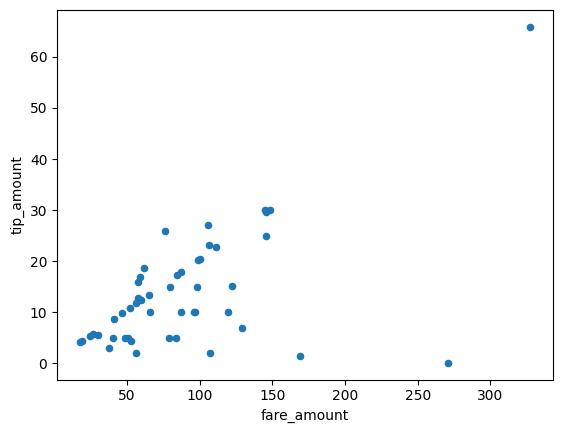

In [29]:
taxi.plot.scatter(x='fare_amount', y='tip_amount')
plt.show()

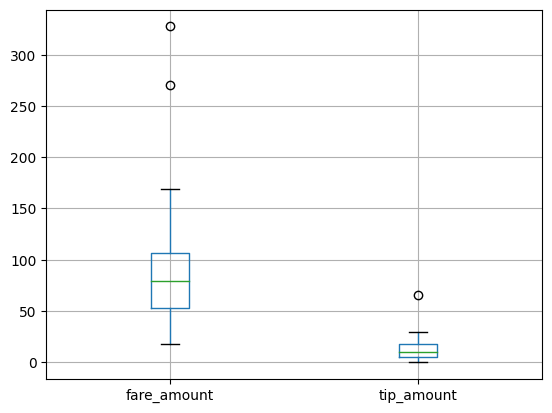

In [30]:
taxi.boxplot(['fare_amount', 'tip_amount'])
plt.show()

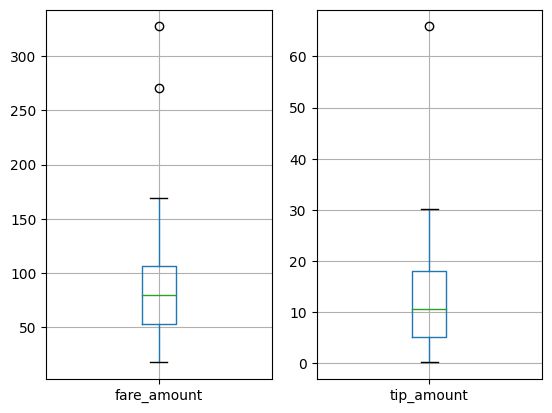

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2)
taxi.boxplot('fare_amount', ax=axes[0], meanline=True)
taxi.boxplot('tip_amount', ax=axes[1], meanline=True)
plt.show()

Fare amount

In [32]:
fare_amount_q1 = taxi['fare_amount'].quantile(0.25)     #q1
fare_amount_q3 = taxi['fare_amount'].quantile(0.75)     #q3
fare_amount_iqr = fare_amount_q3 - fare_amount_q1   #iqr
fare_amount_low = fare_amount_q1 - 1.5 * fare_amount_iqr    #whisker low
fare_amount_high = fare_amount_q3 + 1.5 * fare_amount_iqr   #whikser high

Tip amount

In [33]:
tip_amount_q1 = taxi['tip_amount'].quantile(0.25)
tip_amount_q3 = taxi['tip_amount'].quantile(0.75)
tip_amount_iqr = tip_amount_q3 - tip_amount_q1
tip_amount_low = tip_amount_q1 - 1.5 * tip_amount_iqr
tip_amount_high = tip_amount_q3 + 1.5 * tip_amount_iqr

Outliers

In [34]:
outliers = taxi.query(f'(fare_amount > {fare_amount_high} or fare_amount < {fare_amount_low}) or (tip_amount > {tip_amount_high} or tip_amount < {tip_amount_low})')
taxi.query(f'(fare_amount <= {fare_amount_high} and fare_amount >= {fare_amount_low}) and (tip_amount <= {tip_amount_high} and tip_amount >= {tip_amount_low})', inplace=True)

In [35]:
outliers

,trip_distance,tpep_pickup_datetime,tip_amount,fare_amount,RatecodeID
638727,67.40,2021-05-09 14:41:58,65.9,327.5,4.0
651141,66.58,2021-05-09 17:53:42,0.1,270.5,4.0


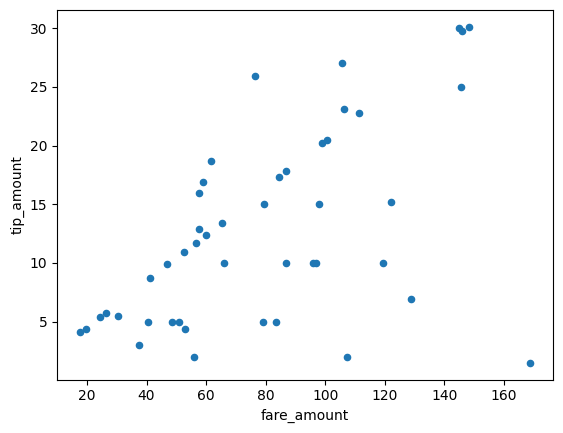

In [36]:
taxi.plot.scatter(x='fare_amount', y='tip_amount')
plt.show()

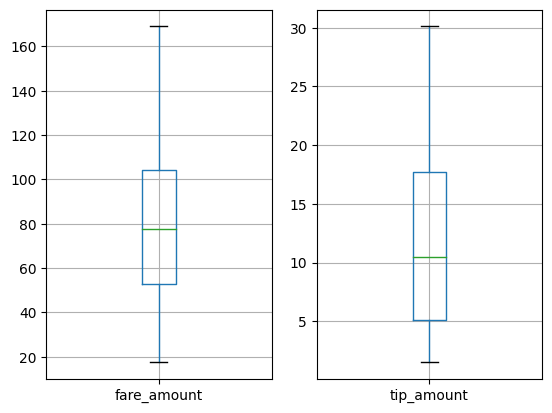

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2)
taxi.boxplot('fare_amount', ax=axes[0], meanline=True)
taxi.boxplot('tip_amount', ax=axes[1], meanline=True)
plt.show()

In [38]:
taxi.describe()

,trip_distance,tip_amount,fare_amount,RatecodeID
count,46.000000,46.000000,46.000000,46.0
mean,22.604783,12.740652,79.391304,4.0
std,10.816621,8.281330,38.027024,0.0
min,4.600000,1.500000,17.500000,4.0
25%,15.892500,5.100000,52.625000,4.0
50%,21.240000,10.455000,77.750000,4.0
75%,29.160000,17.685000,104.250000,4.0
max,60.270000,30.110000,169.000000,4.0
